# OVERVIEW

#### Autoencoders are a type of artificial neural networks that are used to perform a task of data encoding (representation learning).
#### We will feed in noisy images from the mnist-fashion dataset as input.
#### The output will be clean (denoised) image


# IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Load dataset 
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


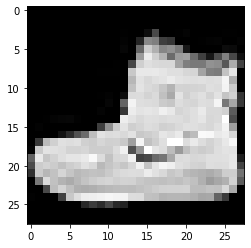

In [3]:
# Visualize a sample image
plt.imshow(x_train[0], cmap='gray')

In [4]:
# check out the shape of the training data
x_train.shape

(60000, 28, 28)

In [5]:
# check out the shape of the testing data
x_test.shape

(10000, 28, 28)

# DATA VISUALIZATION

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot

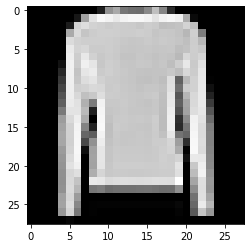

In [6]:
# Let's view some images!
i = random.randint(1,60000)
plt.imshow(x_train[i], cmap='gray')

In [7]:
label = y_train[i]
label

2

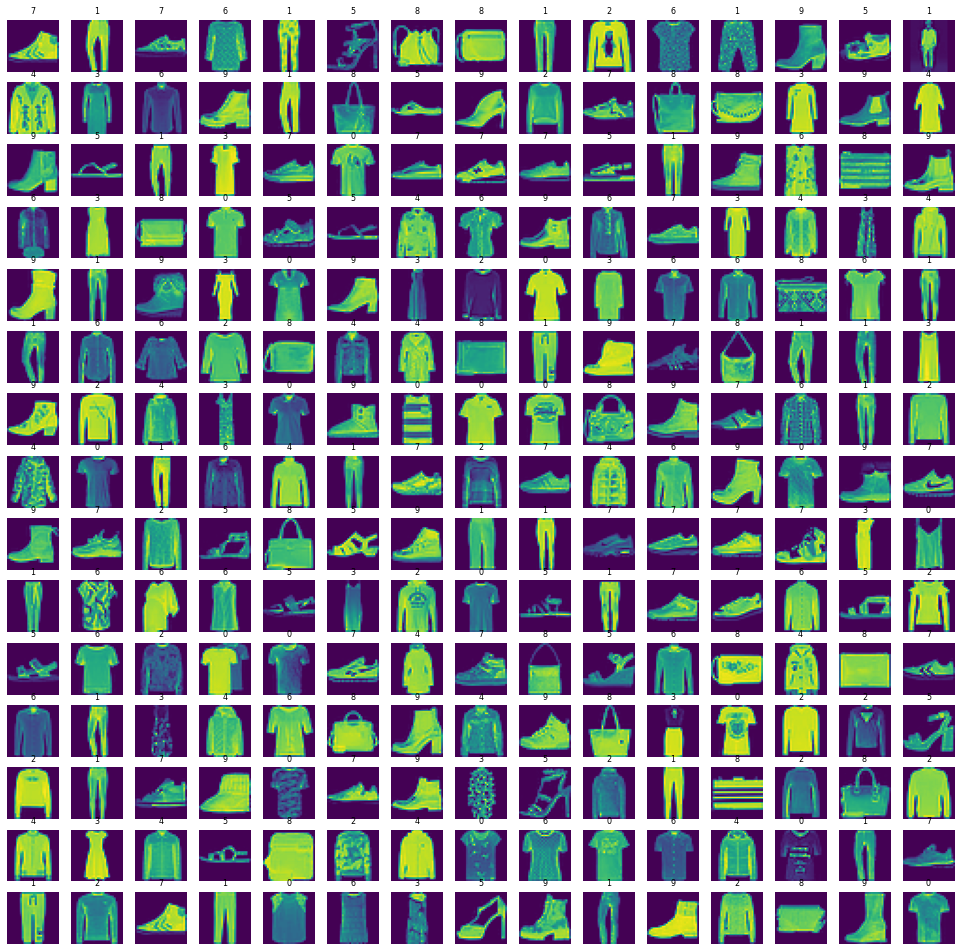

In [8]:
# view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')



# DATA PREPROCESSING

In [9]:
# normalize data
x_train = x_train/255
x_test = x_test/255

In [10]:
# add some noise
noise_factor = 0.3
noise_dataset = []

for img in x_train:
    noisy_image = img + noise_factor* np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

In [11]:
noise_dataset = np.array(noise_dataset)

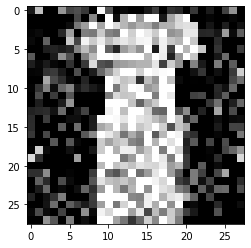

In [12]:
plt.imshow(noise_dataset[20], cmap='gray')

In [13]:
# add noise to testing dataset
noise_factor = 0.2
noise_test_dataset = []

for img in x_test:
    noisy_image = img + noise_factor* np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

In [14]:
noise_test_dataset = np.array(noise_test_dataset)

# BUILD AND TRAIN AUTOENCODER MODEL

In [33]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras import Model

def make_convolutional_autoencoder():
    # encoding
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(16, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(padding='same')(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = MaxPooling2D(padding='same')(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    encoded = MaxPooling2D(padding='same')(x)    
    
    # decoding
    x = Conv2D( 8, 3, activation='relu', padding='same')(encoded)
    x = UpSampling2D()(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = UpSampling2D()(x)
    x = Conv2D(16, 3, activation='relu')(x) # <= padding='valid'!
    x = UpSampling2D()(x)
    decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)
    
    # autoencoder
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# create a convolutional autoencoder
autoencoder = make_convolutional_autoencoder()


In [34]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0     

In [35]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               x_train.reshape(-1, 28, 28, 1),
               epochs = 50,
               batch_size = 128,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3615 - val_loss: 0.3204
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3129 - val_loss: 0.3106
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3062 - val_loss: 0.3062
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3032 - val_loss: 0.3042
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3011 - val_loss: 0.3032
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2996 - val_loss: 0.3013
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2985 - val_loss: 0.3001
Epoch 8/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2975 - val_loss: 0.2992
Epoch 9/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2968 - val_loss: 0.2989
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2961 - val_loss: 0.2986

# EVALUATE TRAINED MODEL PERFORMANCE

In [37]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

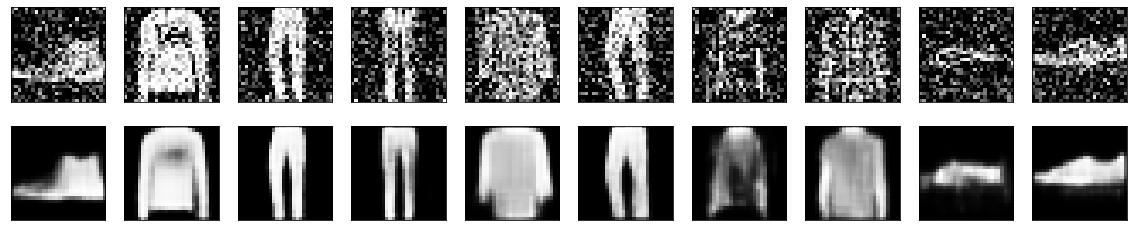

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)